In [2]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

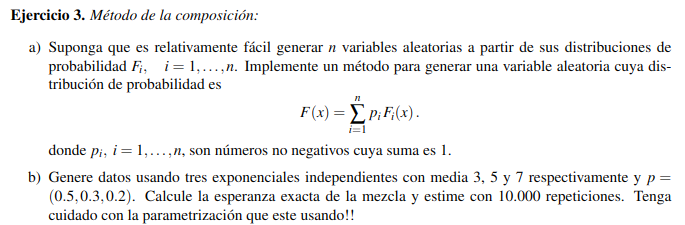

In [3]:
def metodo_composicion(p,fi):
    # p es el arreglo de probabilidades correspondientes a cada fi
    u = rd.random()
    acum = 0
    for i in range(len(p)):
        acum += p[i] 
        if u < acum: # si el numero aleatorio es menor que la prob acomulada, devuelvo el valor correspondiente
            return fi[i]['gen'](*fi[i]['params'], -1)

def metodo_composicion_alt(p, fi):
    u = rd.random()
    x = 0
    for i in range(len(p)):
        x += fi[i]['gen'](*fi[i]['params'], u)*p[i]
    return x

In [4]:
def gen_exponencial (lamda, x):
    if x == -1 : x = 1 - rd.random()
    return -np.log(1-x)/lamda

p = [0.5, 0.3, 0.2]
# a dict containing the gen functions an its parameters
fi = {
    0 :{
        'gen': gen_exponencial,
        'params': [1/3]
    },
    1 :{
        'gen': gen_exponencial,
        'params': [1/5]
    },
    2 :{
        'gen': gen_exponencial,
        'params': [1/7]
    }
}

In [5]:
def esperanza_met1(nsims):
    suma = 0
    for i in range(nsims):
        suma += metodo_composicion(p, fi)
    return suma/nsims

def esperanza_met2(nsims):
    suma = 0
    for i in range(nsims):
        suma += metodo_composicion_alt(p, fi)
    return suma/nsims

In [6]:
nsims = 10000
print(esperanza_met1(nsims))
print(esperanza_met2(nsims))

4.404512871335754
4.3880315047211065


La esperanza teorica de la Variable es 

$$
E[X] = \int_{-\infty}^{\infty} \sum_{i=1}^{3} p_i F_i(x)dx \\
= \int_{-\infty}^{\infty} 0.5 \cdot f_{1/3}(x) dx + \int_{-\infty}^{\infty} 0.3 \cdot f_{1/5}(x) dx + \int_{-\infty}^{\infty} 0.2 \cdot f_{1/7}(x) dx \\
\text{Donde } f_{\lambda} \text{ es la función de densidad de la exponencial con parámetro } \lambda \\ \text{entonces calculo la esperanza correspondiente para cada exponencial y quda: }\\
= 0.5 \cdot 3 + 0.3 \cdot 5 + 0.2 \cdot 7 = 4.4
$$

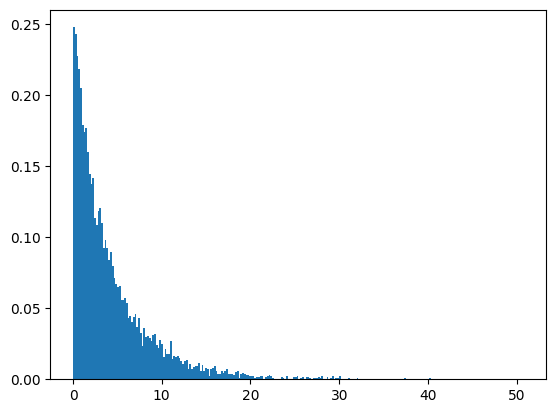

In [7]:
# histograma de los valores generados de la variable aleatoria
x = [metodo_composicion(p, fi) for i in range(nsims)]


plt.hist(x, bins=256,density=True)

# grafiicar la funcion de densidad de probabilidad

plt.show()
